In [210]:
# Notebook to slim the production files for the LPR
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors
import pandas as pd
import dask.dataframe as dd
from mpl_interactions import ioff, panhandler, zoom_factory
from scipy.optimize import curve_fit
import re


In [171]:
parts = pd.read_hdf("/Users/mistryk2/Packages/nexus/ATPC_0nuBB_slim_contained.h5", "parts")
parts_all = parts
parts = parts[parts.primary == 1]
display(parts)

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,0,2,e-,1,0,-1649.414551,-494.455688,1798.859741,0.0,-1612.393066,...,0.267767,-2.121300,0.038706,0.0,0.0,0.0,1.687689,1792.741577,none,eIoni
571,0,1,e-,1,0,-1649.414551,-494.455688,1798.859741,0.0,-1785.806763,...,0.101439,0.697323,0.940026,0.0,-0.0,0.0,0.770141,1001.780212,none,eIoni
810,1,2,e-,1,0,-339.825592,-1011.818176,1504.148438,0.0,-1090.570068,...,-1.268779,-1.634101,0.565937,-0.0,-0.0,-0.0,1.693880,2951.979980,none,eIoni
1187,1,1,e-,1,0,-339.825592,-1011.818176,1504.148438,0.0,-313.506989,...,0.675059,0.653341,-0.694130,0.0,-0.0,-0.0,0.763950,1145.618652,none,eIoni
1397,2,2,e-,1,0,-2522.855713,1446.199951,-1855.192749,0.0,-2466.890869,...,-0.759447,-0.777215,-0.200724,0.0,-0.0,-0.0,0.706471,945.024780,none,eIoni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387777,14990,1,e-,1,0,-472.050385,577.029602,-2339.721436,0.0,-165.074036,...,0.423086,-0.199100,1.576281,0.0,0.0,0.0,1.210752,1330.651123,none,eIoni
8389264,14994,2,e-,1,0,1112.950928,-1992.323853,1370.848877,0.0,47.912186,...,-2.098014,-0.903678,-0.687175,0.0,0.0,-0.0,1.928596,2810.102783,none,eIoni
8389789,14994,1,e-,1,0,1112.950928,-1992.323853,1370.848877,0.0,1197.635376,...,0.536575,-0.307069,0.662390,0.0,-0.0,0.0,0.529234,785.870728,none,eIoni
8389872,14995,2,e-,1,0,419.655701,1837.625000,907.264587,0.0,-33.228096,...,-0.535710,1.930005,1.287773,-0.0,0.0,0.0,1.924445,2687.983643,none,eIoni


In [187]:
part0 = parts_all[parts_all.event_id == 0]
pd.set_option('display.max_rows', 10)
display(part0)

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,0,2,e-,1,0,-1649.414551,-494.455688,1798.859741,0.000000,-1612.393066,...,0.267767,-2.121300,0.038706,0.0,0.0,0.0,1.687689,1792.741577,none,eIoni
1,0,117,e-,0,2,-1612.399048,-778.782349,2405.236084,6.931922,-1612.399048,...,0.001307,-0.003698,0.005483,-0.0,0.0,0.0,0.000044,0.000161,eIoni,msc
2,0,116,e-,0,2,-1612.399048,-778.782349,2405.236084,6.931922,-1612.399170,...,-0.000551,-0.003600,0.002783,0.0,-0.0,0.0,0.000021,0.001776,eIoni,msc
3,0,115,e-,0,2,-1612.399048,-778.782349,2405.236084,6.931922,-1612.399414,...,-0.002174,0.009042,0.010062,-0.0,0.0,0.0,0.000184,0.006350,eIoni,eIoni
4,0,114,e-,0,2,-1612.399048,-778.782349,2405.236084,6.931922,-1612.397949,...,0.023369,-0.002840,-0.000125,-0.0,-0.0,-0.0,0.000542,0.026498,eIoni,eIoni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0,577,e-,0,1,-1658.275146,-471.057892,1843.992554,0.190308,-1658.209717,...,0.053982,0.038112,0.014596,-0.0,-0.0,-0.0,0.004462,0.290099,eIoni,eIoni
806,0,576,e-,0,1,-1656.551270,-473.093018,1837.855103,0.165602,-1656.559204,...,-0.015089,-0.031105,0.016344,0.0,0.0,-0.0,0.001429,0.073372,eIoni,eIoni
807,0,575,e-,0,1,-1656.014893,-474.739563,1834.402588,0.151493,-1656.006104,...,0.016741,0.033874,-0.015702,0.0,-0.0,-0.0,0.001636,0.072907,eIoni,eIoni
808,0,574,e-,0,1,-1655.817993,-475.175964,1833.575073,0.148006,-1655.814331,...,0.020568,0.026768,-0.008600,0.0,0.0,0.0,0.001186,0.069041,eIoni,eIoni


In [172]:
hits = pd.read_hdf("/Users/mistryk2/Packages/nexus/ATPC_0nuBB_slim_contained.h5", "hits")
display(hits)
# print(hits.label.unique())

,event_id,x,y,z,time,energy,particle_id
0,0,-1649.376953,-494.753265,1798.865112,0.001029,0.000015,2
1,0,-1649.351929,-494.951660,1798.868774,0.001715,0.000669,2
2,0,-1649.326538,-495.153748,1798.872314,0.002413,0.000006,2
3,0,-1649.318726,-495.225555,1798.873291,0.002661,0.000149,2
4,0,-1649.294800,-495.424042,1798.878418,0.003347,0.000018,2
...,...,...,...,...,...,...,...
214231617,14995,427.154572,1828.864502,912.748535,0.060335,0.000763,611
214231618,14995,427.176880,1828.850342,912.754395,0.061102,0.000367,611
214231619,14995,427.185699,1828.829468,912.748962,0.061801,0.000974,611
214231620,14995,427.193207,1828.841309,912.753296,0.062326,0.001446,611


In [173]:
# Sum the energy of the hits and get rid of the uncontained events in the dataframe
hit_tot_energy = hits.groupby('event_id')['energy'].sum().reset_index(name='hit_tot_energy')
# contained_hit_events = hit_tot_energy[hit_tot_energy.hit_tot_energy > 2.45].event_id.unique()
# hits_contained_df = hits[hits.event_id.isin(contained_hit_events) ]
# hits_contained_df = hits_contained_df.drop(columns=['label', 'hit_id'])
# parts_contained_df = parts_all[parts_all.event_id.isin(contained_hit_events) ]
display(hit_tot_energy)

,event_id,hit_tot_energy
0,0,2.45783
1,1,2.45783
2,2,2.45783
3,3,2.45783
4,4,2.45783
...,...,...
7766,14986,2.45783
7767,14988,2.45783
7768,14990,2.45783
7769,14994,2.45783


In [174]:
# # Open the HDF5 file in write mode
# with pd.HDFStore("/Users/mistryk2/Packages/nexus/ATPC_0nuBB_slim_contained.h5", mode='w', complevel=5, complib='zlib') as store:
#     store.put('parts',parts_contained_df, format='table')
#     store.put('hits',hits_contained_df, format='table')

Text(0.5, 1.0, '2nuBB at 1 bar, 15k events contained in 2.5 m')

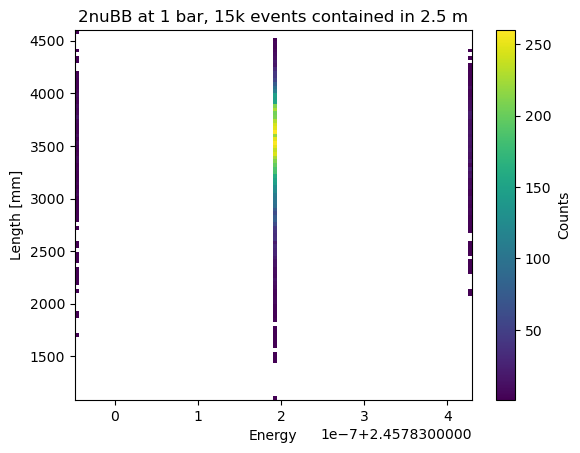

In [175]:
plt.figure()
# plt.scatter(parts.kin_energy, parts.length)

sum_df = parts.groupby('event_id').sum().reset_index()
# display(sum_df)

df = sum_df

# cutval = 2500

# df = df[ (df.final_x > -cutval ) & (df.final_x <cutval )]
# df = df[ (df.final_y > -cutval ) & (df.final_y <cutval )]
# df = df[ (df.final_z > -cutval ) & (df.final_z <cutval )]

contained_evt_ids = df.event_id.unique()

# Create 2D histogram
plt.hist2d(df.kin_energy, df.length, bins = 100, cmap='viridis', cmin=0.00001)

# Add color bar
plt.colorbar(label='Counts')

# Add labels and title
plt.xlabel('Energy')
plt.ylabel('Length [mm]')
plt.title('2nuBB at 1 bar, 15k events contained in 2.5 m')


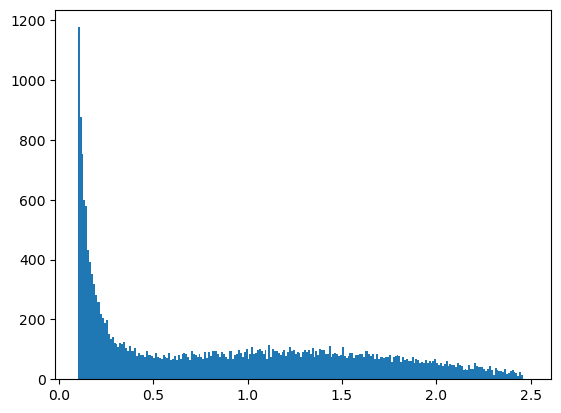

In [212]:
%matplotlib inline
# Plot the energy distribution of all particles
electrons = parts_all[parts_all.particle_name == "e-"]
plt.figure()
plt.hist(electrons.kin_energy, bins = np.arange(0.1, 2.5, 0.01));

[]


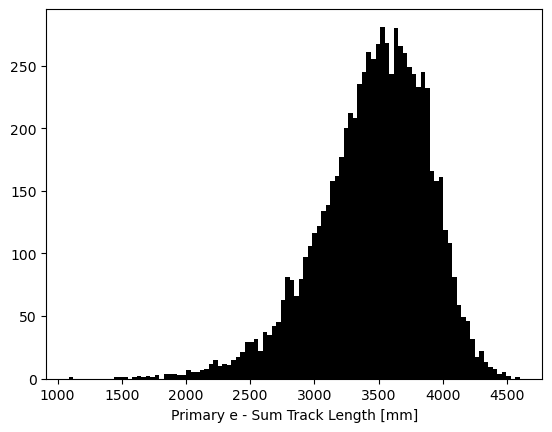

In [177]:
plt.figure()
plt.hist(sum_df.length, bins = 100, color = "k");
plt.xlabel("Primary e - Sum Track Length [mm]")

print(sum_df[sum_df.length < 10].event_id.values)

# display(sum_df[sum_df.length < 2000])

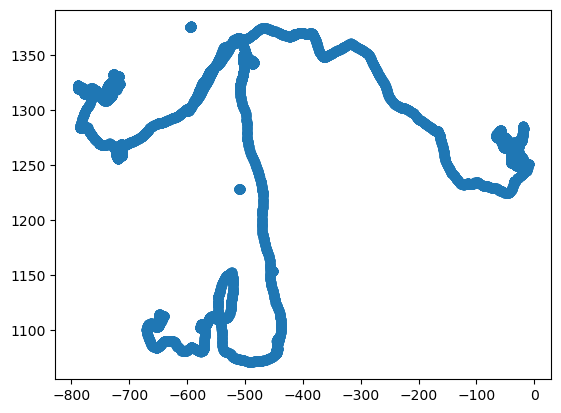

In [178]:
plt.figure()

# 14117

events = hits[hits.event_id == 14117]
# print(events.length)

plt.scatter(events.x, events.y)

,event_id,particle_id,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,final_y,...,final_t,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,hit_tot_energy
0,0,3,2,0,-3298.829102,-988.911377,3597.719482,0.0,-3398.199707,-1519.050293,...,11.169573,0.369206,-1.423977,0.978732,0.0,0.0,0.0,2.45783,2794.521729,1.264859
1,1,3,2,0,-679.651184,-2023.636353,3008.296875,0.0,-1404.077026,-1791.237549,...,15.857262,-0.593721,-0.980759,-0.128193,0.0,0.0,0.0,2.45783,4097.598633,0.822851
2,2,3,2,0,-5045.711426,2892.399902,-3710.385498,0.0,-4550.093750,2022.322998,...,14.604293,-0.938010,-0.566581,1.985802,0.0,0.0,0.0,2.45783,3759.238770,0.887979
3,3,3,2,0,-869.517700,-1178.476685,-117.600876,0.0,-2258.354004,-2109.110840,...,14.396933,0.481901,-0.752752,0.992470,0.0,0.0,0.0,2.45783,3662.074219,0.937238
4,4,3,2,0,5826.209473,-903.481873,5568.973145,0.0,5233.089844,-1527.956665,...,12.464792,-2.335977,0.463590,-1.386350,0.0,0.0,0.0,2.45783,3266.075928,1.094432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7766,14986,3,2,0,2607.347412,-3712.802002,-5435.856934,0.0,2818.823242,-4488.061523,...,13.755409,2.070323,-1.688386,0.405277,0.0,0.0,0.0,2.45783,3434.790039,0.980689
7767,14988,3,2,0,1231.115234,552.242981,4068.572998,0.0,1163.133301,963.139160,...,11.120486,2.155432,0.840716,-0.737760,0.0,0.0,0.0,2.45783,2775.817871,1.259466
7768,14990,3,2,0,-944.100769,1154.059204,-4679.442871,0.0,-783.722656,1253.394531,...,11.993380,-0.988127,-0.805081,0.890000,0.0,0.0,0.0,2.45783,3045.742188,1.152194
7769,14994,3,2,0,2225.901855,-3984.647705,2741.697754,0.0,1245.547607,-3335.162842,...,14.162445,-1.561438,-1.210747,-0.024786,0.0,0.0,0.0,2.45783,3595.973633,0.946584


Text(0.5, 1.0, '0nuBB at 1 bar')

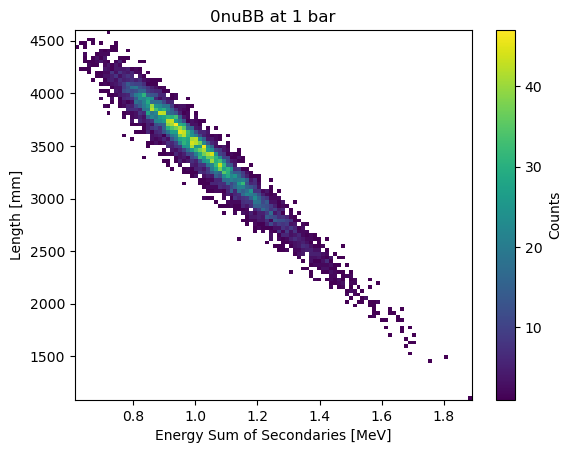

In [179]:
# Get the event ids where there sum of the non primary energy is greater than some threshold
nonprim_tot_energy = hits[hits.particle_id > 2].groupby('event_id')['energy'].sum().reset_index(name='hit_tot_energy')

sum_df_nonprim = pd.merge(sum_df, nonprim_tot_energy, on='event_id')
display(sum_df_nonprim)

# Create 2D histogram
plt.hist2d(sum_df_nonprim.hit_tot_energy, sum_df_nonprim.length, bins = 100, cmap='viridis', cmin=0.00001)

# Add color bar
plt.colorbar(label='Counts')

# Add labels and title
plt.xlabel('Energy Sum of Secondaries [MeV]')
plt.ylabel('Length [mm]')
plt.title('0nuBB at 1 bar')

Text(0.5, 0, 'Summed all Particle Length [mm]')

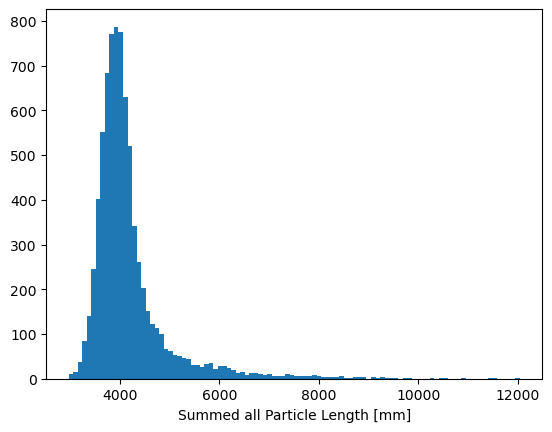

In [180]:
# Plot the sum of all particles
plt.hist(parts_all.groupby('event_id').sum().length, bins = 100);
plt.xlabel('Summed all Particle Length [mm]')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 280.0)

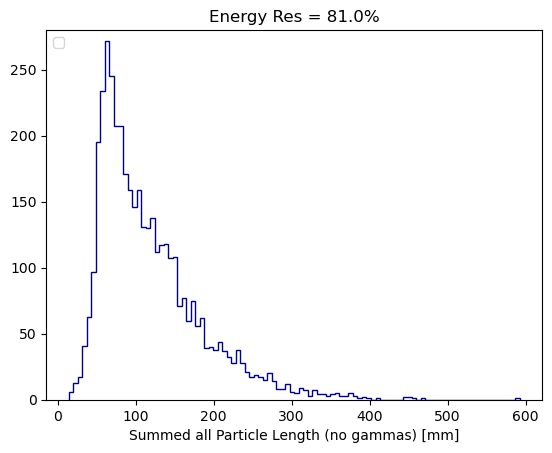

In [196]:
%matplotlib inline
# Loop through the particle table and remove the gamma
# Fit the distribution 
def Gaussian_(x, A, mu, sigma):
    return A * np.exp(-(x-mu)*(x-mu)/(2*sigma*sigma))

counts, xbins,_ =plt.hist(parts_all[ (parts_all.particle_name != "gamma") & (parts_all.kin_energy > 0.1)  & (parts_all.kin_energy < 0.2)].groupby('event_id').sum().length, bins = 100, histtype = "step", color = "darkblue");

bin_centers = xbins+ (xbins[1]-xbins[0])/2.0
bin_centers = bin_centers[:-1]

popt, pcov = curve_fit(Gaussian_, bin_centers, counts, bounds  = ([0 , 2900, 0], [1000, 4800, 1000]), maxfev=50000)


L = np.linspace(2500, 5000, 1000)
# plt.plot(L, Gaussian_(L, popt[0],popt[1],popt[2]), color ="r",label='fit: mu=%5.1f, sigma=%5.1f' % (popt[1], popt[2]))



plt.xlabel('Summed all Particle Length (no gammas) [mm]')
Eres = 100*2.35*popt[2]/popt[1]
plt.title(f"Energy Res = {Eres:.1f}%")
plt.legend(loc = "upper left")
plt.ylim(0, 280)


,event_id,particle_id,length,hit_tot_energy
0,0,2,1792.741577,0.746927
1,0,117,0.000161,0.000044
2,0,116,0.001776,0.000021
3,0,115,0.006350,0.000184
4,0,114,0.026498,0.000542
...,...,...,...,...
5247195,14995,615,0.027602,0.001315
5247196,14995,614,0.078624,0.001538
5247197,14995,613,0.419585,0.005473
5247198,14995,612,0.047628,0.001298


Text(0.5, 1.0, '~1MeV energy deposited e-')

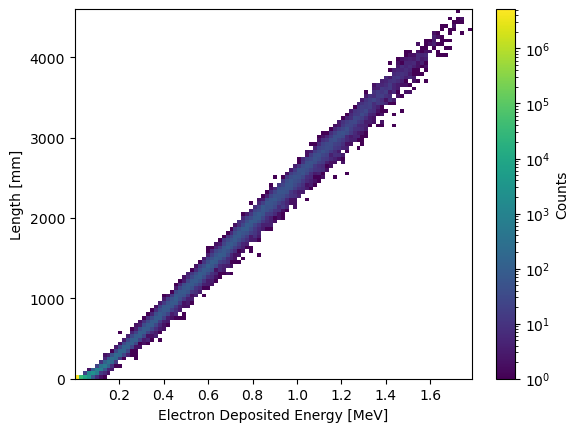

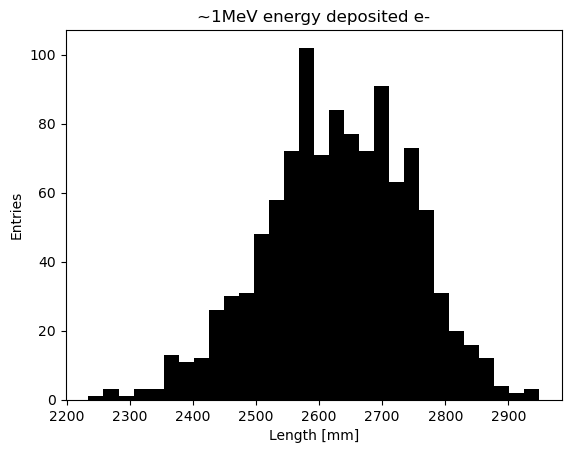

: 

In [233]:
# Plot the track length vs the energy

plt.figure()

electrons = parts_all[parts_all.particle_name == "e-"][["event_id", "particle_id", "length"]]

hit_tot_energy_eminus = hits.groupby(['event_id','particle_id'])['energy'].sum().reset_index(name='hit_tot_energy')

electrons_merged = pd.merge(electrons, hit_tot_energy_eminus, on=['event_id','particle_id'])
display(electrons_merged)


# # Create 2D histogram
plt.hist2d(electrons_merged.hit_tot_energy, electrons_merged.length, bins = 100, cmap='viridis', cmin=0.00001,norm=matplotlib.colors.LogNorm())

# Add color bar
plt.colorbar(label='Counts')

# Add labels and title
plt.xlabel('Electron Deposited Energy [MeV]')
plt.ylabel('Length [mm]')
# plt.title('0nuBB at 1 bar')

plt.figure()
electron_1MeV = electrons_merged[ (electrons_merged.hit_tot_energy > 1) & (electrons_merged.hit_tot_energy < 1.1)]
plt.hist(electron_1MeV.length,bins = 30, color = "k")
plt.xlabel("Length [mm]")
plt.ylabel("Entries")
plt.title("~1MeV energy deposited e-")



[ 2 43 33 11  1]


/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_91786/648624475.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_part['len'] = pd.cut(x=temp_part['len'], bins=Lbins,labels=Lbins_centre, include_lowest=True)


<Figure size 640x480 with 0 Axes>

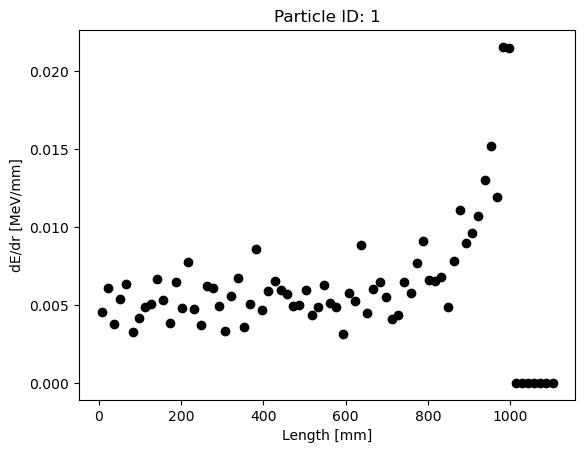

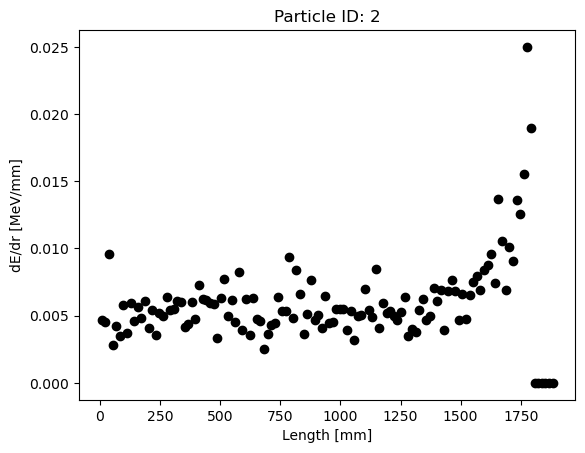

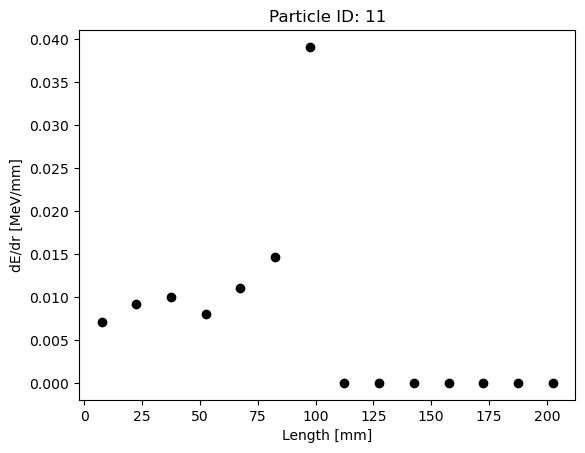

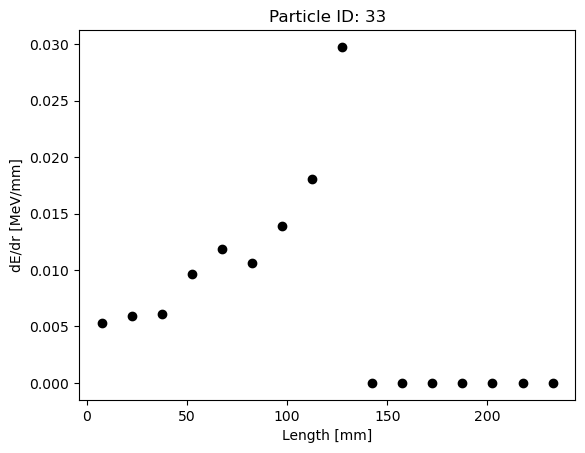

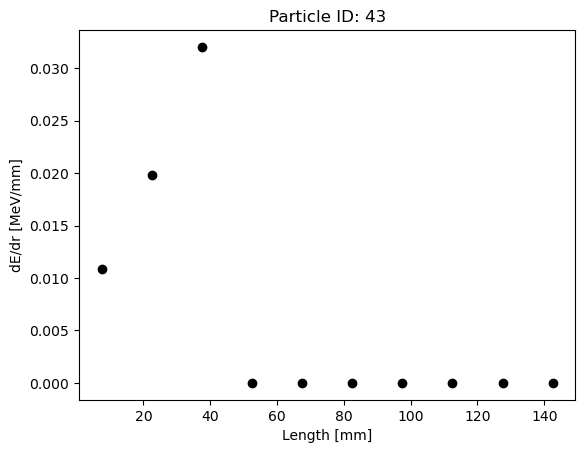

In [182]:
# Try plotting the dE/dL curve for a couple of events
plt.figure()
events = hits[hits.event_id == 0]
# print(events.length)

# display(events)

cum_len = [0]
tot_len = 0
dE = [0]

temp_part2 = parts_all[parts_all.event_id == 0]
# display(temp_part)
highE_daughters = temp_part2[temp_part2.kin_energy > 0.1].particle_id.values
print(highE_daughters)

dfs = []

for daughter in highE_daughters:

    cum_len = [0]
    tot_len = 0
    dE = [0]

    for i in range(len(events)):

        if (i ==0):
            continue

        pos1 = events.loc[i-1]
        pos2 = events.loc[i]

        if (pos1.particle_id != daughter and pos1.particle_id != daughter):
            continue

        dx = pos2.x - pos1.x
        dy = pos2.y - pos1.y
        dz = pos2.z - pos1.z

        tot_len+=np.sqrt(dx**2+dy**2+dz**2)
        cum_len.append(tot_len)
        dE.append(pos2.energy)

    dfs.append(pd.DataFrame({"len": cum_len, "dE": dE, "part_id": daughter}))


df = pd.concat(dfs)

for p in sorted(df.part_id.unique()):

    temp_part = df[df.part_id == p]

    Lmin=0; Lmax=max(round(temp_part.len)+100); Lbw=15
    Lbins = np.arange(Lmin, Lmax+Lbw, Lbw)
    Lbins_centre = np.arange(Lmin+Lbw/2, Lmax+Lbw/2, Lbw)

    temp_part['len'] = pd.cut(x=temp_part['len'], bins=Lbins,labels=Lbins_centre, include_lowest=True)

    temp_part = temp_part.groupby(['part_id', 'len'])['dE'].sum().reset_index()

    plt.figure()
    plt.scatter(temp_part.len, temp_part.dE, color = "k")
    plt.xlabel("Length [mm]")
    plt.ylabel("dE/dr [MeV/mm]")
    plt.title(f"Particle ID: {p}" )


0.5599319
0.94395816
0.006389721
0.0015540636
0.022804916


/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_91786/2668923077.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_part['len'] = pd.cut(x=temp_part['len'], bins=Lbins,labels=Lbins_centre, include_lowest=True)
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/pandas/core/reshape/tile.py:424: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ids[x == bins[0]] = 1


KeyError: 3

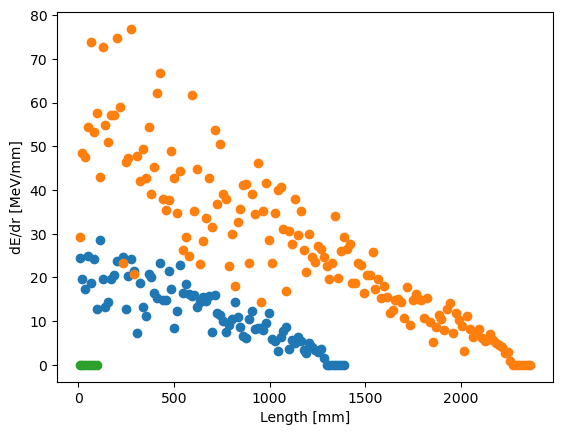

In [221]:
# Do the same plot of dE/dL but for electrons with the same energy
electrons_1MeV = parts_all[ (parts_all.kin_energy > 1)  & (parts_all.kin_energy < 1.1)]
# display(electrons_1MeV)

event_ids_1MeV = electrons_1MeV.event_id.unique()
part_ids_1MeV = electrons_1MeV.particle_id.unique()


# Try plotting the dE/dL curve for a couple of events
events = hits[hits.event_id == 0]
# print(events.length)

# display(events)

cum_len = [0]
tot_len = 0
dE = [0]

dfs = []

for e,p in zip(event_ids_1MeV,part_ids_1MeV):

    temp_part2 = parts_all[parts_all.event_id == e]
    daughter = temp_part2[temp_part2.particle_id == p]

    events = hits[(hits.event_id == e) & (hits.particle_id == p)].reset_index()

    print(events.energy.sum())

    cum_len = [0]
    tot_len = 0
    dE = [0]

    for i in range(len(events)):

        if (i ==0):
            continue

        pos1 = events.loc[i-1]
        pos2 = events.loc[i]

        dx = pos2.x - pos1.x
        dy = pos2.y - pos1.y
        dz = pos2.z - pos1.z

        tot_len+=np.sqrt(dx**2+dy**2+dz**2)
        cum_len.append(tot_len)
        dE.append(pos2.energy)

        dfs.append(pd.DataFrame({"len": cum_len, "dE": dE, "event_id": e}))


df = pd.concat(dfs)

plt.figure()
for e in df.event_id.unique():

    temp_part = df[df.event_id == e]

    Lmin=0; Lmax=max(round(temp_part.len)+100); Lbw=15
    Lbins = np.arange(Lmin, Lmax+Lbw, Lbw)
    Lbins_centre = np.arange(Lmin+Lbw/2, Lmax+Lbw/2, Lbw)

    temp_part['len'] = pd.cut(x=temp_part['len'], bins=Lbins,labels=Lbins_centre, include_lowest=True)

    temp_part = temp_part.groupby(['event_id', 'len'])['dE'].sum().reset_index()

    plt.scatter(temp_part.len, temp_part.dE)
    plt.xlabel("Length [mm]")
    plt.ylabel("dE/dr [MeV/mm]")





In [183]:
eventids = hits.event_id.unique()

print(eventids[:20].tolist())

[0, 1, 2, 3, 4, 7, 9, 11, 12, 15, 21, 23, 24, 26, 27, 29, 30, 32, 34, 36]


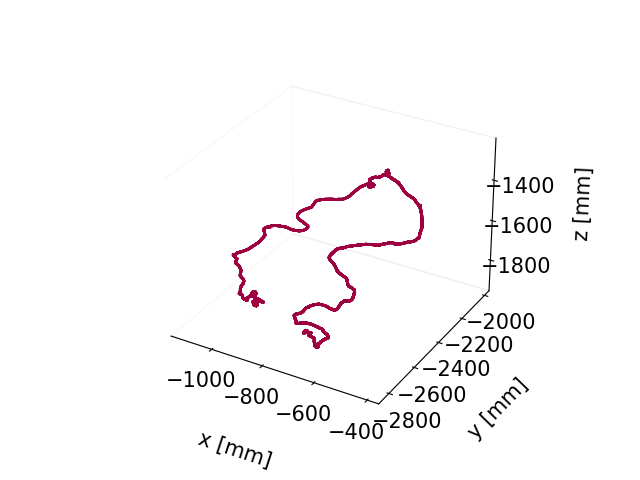

AttributeError: 'Polygon' object has no attribute 'do_3d_projection'

In [184]:
%matplotlib widget

# Make a 3D view of the track
# fig  = plt.figure(figsize=(10, 10))
with plt.ioff():
    fig, axis = plt.subplots()

event_hits = hits[hits.event_id == 7]

# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

fig.set_facecolor('white')
ax.set_facecolor('white')
# ax.scatter(df.x, df.y,  df.z,c= df.energy, cmap='Spectral', s=0.1, label = "reco hits")
ax.scatter(event_hits.x, event_hits.y,  event_hits.z,c= event_hits.energy, cmap='Spectral', s=1, label = "reco hits")

ax.set_xlabel("x [mm]", fontsize = 15, labelpad=20)
ax.set_ylabel("y [mm]", fontsize = 15, labelpad=20)
ax.set_zlabel("z [mm]", fontsize = 15, labelpad=20)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.zaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.tick_params(axis='z', colors='black')

# Set the color of the spines (borders) to white
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Remove background (axis)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# ax.set_xlim(-100, 400)
# ax.set_ylim(0, 1000)
# ax.set_zlim(1500, 3000)


# legend = plt.legend(facecolor = "black")

# Set the text color of the legend
# for text in legend.get_texts():
#     text.set_color('white')  # Set the text color to red

ax.grid(False)
axis.axis('off')

disconnect_zoom = zoom_factory(axis)
# Enable scrolling and panning with the help of MPL
# Interactions library function like panhandler.
pan_handler = panhandler(fig)
display(fig.canvas)